<h2> Prevendo Valores de Casas que foram vendidas </h2>

<p>Neste projeto iremos trabalhar com um conjunto de dados de casas vendidas na cidade de Ames no Iowa, Estados Unidos.
Esse dados foram coletados no período entre 2006 à 2010.
</p>

<p> Você pode entender um pouco mais sobre esses dados e como foram coletados <a href = 'https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627'> aqui </a>
Também pode ler sobre as diferentes colunas nesse conjunto <a href = 'https://s3.amazonaws.com/dq-content/307/data_description.txt'> aqui.</a>
</p>

<p> Primeiramente vamos importar as bibliotecas que iremos utilizar, como pandas, matplotlib, numpy e scikit-learn.</p>
<p>Também iremos importar o nosso dataset. </p>

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [217]:
dataset = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<p>Agora vamos criar umas funções que irão facilitar nosso trabalho futuramente, estas funções são:
<li> transform_features() - Retorna o nosso conjunto de treino; </li>
<li> select_features() - Retorna o conjunto de features de treino que por enquanto será as colunas Gr Liv Area e SalePrice do conjunto de treino;</li>
<li> train_and_test() - Realizara a divisão entre o conjunto de treino e teste do nosso modelo de regressão.</li>
</p>

<p>Por fim, vamos avaliar nosso modelo utilizando o RMSE como base. </p>


In [210]:
def transform_features(dataset):
    return dataset

In [211]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [212]:
def train_and_test(df):
    train = df[0:1460] #Conjunto de Treino
    test = df[1460:] # Conjunto de Teste
    #Vamos selecionar apenas as colunas de valores númericos
    numerical_train =  train.select_dtypes(include = ['integer' , 'float'])
    numerical_test = test.select_dtypes(include = ['integer', 'float'])
    features = numerical_train.columns.drop('SalePrice')
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(train[features], train['SalePrice'])

    predictions = linear_regression_model.predict(test[features])
    
    mse = mean_squared_error(test['SalePrice'], predictions)
    
    rmse = np.sqrt(mse)
    return rmse
  
    
    
transform_features = transform_features(dataset)
filtered_df = select_features(transform_features)
rmse = train_and_test(filtered_df)
rmse

57088.25161263909

<h3>Engenharia de Recursos </h3>

<p> Agora vamos remover algumas colunas que possuam valores ausentes, mergulhando afundo entre colunas que apresentem valores categoricos e transformar texto em valores númericos através da técnica da normalização de dados. </p>

<p> Para isso vamos modificar a nossa função de transform_features(), para que qualquer coluna do dataframe que possua mais que 25% de valores ausentes iremos remover do nosso modelo.</p>

<p> Também vamos remover colunas que vazem informações sobre a venda, como por exemplo ano que foi vendido.</p>

<p> No geral o que iremos fazer é:
    <li> Remover certas características que não serão utilizados pelo nosso modelo (baseado no número de valores ausentes);</li>
    <li> Transformar no formato correto (Variáveis categóricas em númericas, técnicas de normalização e preenchendo valores ausentes); </li>
</p>

<p>Qual coluna contém menos que 5% dos dados ausentes? </p>

In [213]:
data_missing = dataset.isnull().sum()
data_missing

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [214]:
drop_missing_values = data_missing[(data_missing > len(dataset)/20)].sort_values()
drop_missing_values


Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [196]:
dataset = dataset.drop(drop_missing_values.index, axis=1)

<p> Agora vamos tratar os dados categoricos e remover os dados que temos ausência de dados.</p>

In [197]:
text_mv_columns = dataset.select_dtypes(include = ['object']).isnull().sum()
text_mv_columns

MS Zoning          0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      23
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Heating            0
Heating QC         0
Central Air        0
Electrical         1
Kitchen Qual       0
Functional         0
Paved Drive        0
Sale Type          0
Sale Condition     0
dtype: int64

In [198]:
drop_missing_values_2 = text_mv_columns[text_mv_columns > 0]
drop_missing_values_2

Mas Vnr Type      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Electrical         1
dtype: int64

In [199]:
dataset = dataset.drop(drop_missing_values_2.index,  axis = 1)

<p> Agora vamos preencher nas nossas variáveis númericas vamos reescrever com os valores mais frequentes!</p>

In [200]:
num_missing = dataset.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(dataset)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [176]:
replace_numeric_dict = dataset[fixable_numeric_cols.index].mode().to_dict(orient = 'records')[0]
replace_numeric_dict

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [201]:
dataset = dataset.fillna(replace_numeric_dict)
dataset

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,189000


In [202]:
dataset.isnull().sum()

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
                  ..
Central Air        0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Garage Cars        0
Garage Area  

<p> Temos uma coluna sobre ano que ela foi construida e quando foi vendida, isso não é muito interessante para o nosso conjunto de dados.
Então vamos criar uma nova coluna e ver quanto tempo ela foi vendida logo após que foi construida.</p>

In [203]:
years_sold = dataset['Yr Sold'] - dataset['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [204]:
year_remod = dataset['Yr Sold'] - dataset['Year Remod/Add']
year_remod[year_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [205]:
dataset['Year Before Sold'] = years_sold
dataset['Years Since Remod'] = year_remod

## Drop rows with negative values for both of these new features
dataset = dataset.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
dataset = dataset.drop(["Year Built", "Year Remod/Add"], axis = 1)

In [206]:

dataset = dataset.drop(["PID", "Order"], axis=1)


dataset = dataset.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [226]:
def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.36731241307

<h3> Seleção de Recursos</h3>

In [229]:
numerical = transform_df.select_dtypes(include = ['int', 'float'])
numerical.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,62,0,0,0,0,0,2010,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,0,0,0,120,0,0,2010,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,36,0,0,0,0,12500,2010,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,...,0,0,0,0,0,0,2010,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,...,34,0,0,0,0,0,2010,189900,13,12


In [234]:
corr_values = numerical.corr()['SalePrice'].sort_values(ascending = False)
corr_values

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Full Bath            0.546118
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Wood Deck SF         0.328183
Open Porch SF        0.316262
Half Bath            0.284871
Bsmt Full Bath       0.276258
2nd Flr SF           0.269601
Lot Area             0.267520
Bsmt Unf SF          0.182751
Bedroom AbvGr        0.143916
Screen Porch         0.112280
Pool Area            0.068438
3Ssn Porch           0.032268
BsmtFin SF 2         0.006127
Misc Val            -0.019273
Yr Sold             -0.030358
Bsmt Half Bath      -0.035875
Low Qual Fin SF     -0.037629
MS SubClass         -0.085128
Overall Cond        -0.101540
Kitchen AbvGr       -0.119760
Enclosed Porch      -0.128685
Years Since Remod   -0.534985
Years Befo

<p> É um pouco díficil visualizar a correlação entre os dados, então vamos gerar um mapa de calor e obsevar as correlações.
Vamos observar as correlações acima de 0.3 por motivos de importância dos dados.</p>

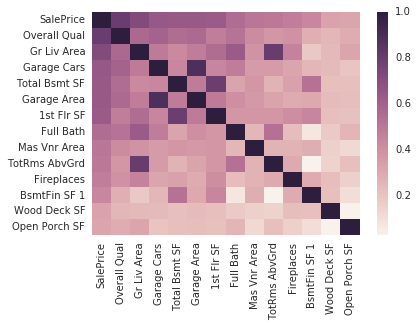

In [242]:
import seaborn as sns
%matplotlib inline
strong_correlations = corr_values[corr_values > 0.3]
correlations = numerical[strong_correlations.index].corr()
sns.heatmap(correlations)


<p>Agora temos que ver quais variáveis categoricas devemos manter para o nosso modelo.</p>

In [251]:

## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
nominal_features

['PID',
 'MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [259]:
categorical_cols = []

for cat in nominal_features:
    if cat in transform_df.columns:
        categorical_cols.append(cat)

## How many unique values in each categorical column?
uniqueness_counts = transform_df[categorical_cols].apply(lambda col: len(col.value_counts())).sort_values()
## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [266]:
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
     transform_df[col] = transform_df[col].astype('category')
#Transform into dummy cat

transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

transform_df

,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,1,0
1,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,...,0,0,0,0,0,0,1,0,0,1
2,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1
3,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1
4,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1
5,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1
6,RL,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1
7,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1
8,RL,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1
9,RL,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1


In [274]:
def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

NameError: name 'linear_model' is not defined